In [45]:
from importlib import reload

import pandas as pd

import matplotlib.pyplot as plt
import geopandas as gpd


import langmap

In [35]:
reload(langmap)

<module 'langmap' from '/Users/gthill/projects/sils/langmap.py'>

In [2]:
langs = pd.read_csv('data/languages.csv')

In [39]:
langs.head()

,ID,Name,Macroarea,Latitude,Longitude,Glottocode,ISO639P3code,Family,Subfamily,Genus,ISO_codes,Samples_100,Samples_200,geometry
0,aab,Arapesh (Abu),NaN,-3.450000,142.950000,NaN,NaN,Torricelli,NaN,Kombio-Arapesh,NaN,False,False,POINT (142.95000 -3.45000)
1,aar,Aari,NaN,6.000000,36.583333,aari1239,aiw,Afro-Asiatic,Omotic,South Omotic,aiw,False,False,POINT (36.58333 6.00000)
2,aba,Abau,NaN,-4.000000,141.250000,abau1245,aau,Sepik,NaN,Upper Sepik,aau,False,False,POINT (141.25000 -4.00000)
3,abb,Arabic (Chadian),NaN,13.833333,20.833333,chad1249,shu,Afro-Asiatic,NaN,Semitic,shu,False,False,POINT (20.83333 13.83333)
4,abd,Abidji,NaN,5.666667,-4.583333,abid1235,abi,Niger-Congo,NaN,Kwa,abi,False,False,POINT (-4.58333 5.66667)


In [40]:
len(langs)

2662

In [3]:
langs_geo = gpd.GeoDataFrame(
    langs, geometry=gpd.points_from_xy(langs.Longitude, langs.Latitude)
)

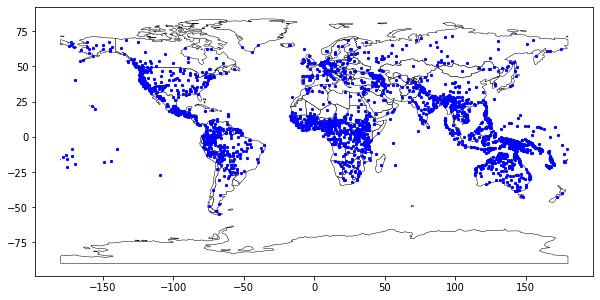

In [36]:
langmap.plot(langs_geo)
plt.show()

In [38]:
features = pd.read_csv('data/parameters.csv')

In [41]:
features.head()

,ID,Name,Description,Contributor_ID,Chapter,Area
0,1A,Consonant Inventories,NaN,maddiesoni,Consonant Inventories,Phonology
1,2A,Vowel Quality Inventories,NaN,maddiesoni,Vowel Quality Inventories,Phonology
2,3A,Consonant-Vowel Ratio,NaN,maddiesoni,Consonant-Vowel Ratio,Phonology
3,4A,Voicing in Plosives and Fricatives,NaN,maddiesoni,Voicing in Plosives and Fricatives,Phonology
4,5A,Voicing and Gaps in Plosive Systems,NaN,maddiesoni,Voicing and Gaps in Plosive Systems,Phonology


In [42]:
len(features)

192

In [43]:
values = pd.read_csv('data/values.csv')

In [44]:
values.head()

,ID,Language_ID,Parameter_ID,Value,Code_ID,Comment,Source,Example_ID
0,81A-aab,aab,81A,2,81A-2,NaN,Nekitel-1985[94],NaN
1,82A-aab,aab,82A,1,82A-1,NaN,Nekitel-1985[94],NaN
2,83A-aab,aab,83A,2,83A-2,NaN,Nekitel-1985[94],NaN
3,87A-aab,aab,87A,2,87A-2,NaN,Nekitel-1985[95],NaN
4,88A-aab,aab,88A,2,88A-2,NaN,Nekitel-1985[95],NaN
